# Assignment 3 - Landon Burleson

## Problem 1 - CNN Architectures

In [15]:
#Adding in the necessary modules needed to complete Assignment 3
import numpy as np
import matplotlib.pyplot as plt
import sys
import tensorflow as tf
from tensorflow import keras

In [16]:
#Pulling in the MNIST test data.
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data() 

In [17]:
#Creating the sequential model for a the number of filters decreasing as the layers increase
cnn_model1 = keras.models.Sequential([
    #Convolution front end.
    keras.layers.Conv2D(32, (3, 3), activation="relu", padding="same", input_shape = [28, 28, 1], name="conv1"),
    keras.layers.MaxPooling2D((2, 2), name="maxpool1"),
    keras.layers.Conv2D(64, (3, 3), activation="relu", padding="same", name="conv2"),
    keras.layers.Conv2D(64, (3, 3), activation="relu", padding="same", name="conv3"),
    keras.layers.MaxPooling2D((2, 2), name="maxpool2"),
    keras.layers.Conv2D(128, (3, 3), activation="relu", padding="same", name="conv4"), 
    keras.layers.Conv2D(128, (3, 3), activation="relu", padding="same", name="conv5"), 
    keras.layers.MaxPooling2D((2, 2), name="maxpool3"),
    keras.layers.Conv2D(256, (3, 3), activation="relu", padding="same", name="conv6"), 
    keras.layers.MaxPooling2D((2, 2), name="maxpool4"),

	#Deep learning layers
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu", name="deep1"), #Dense layers can be atributed to a 'regular' hidden layer of neurons
    keras.layers.Dense(10, activation="softmax", name="deep2") 
])
cnn_model1._name = "cnn_model1"
# cnn_model1.save_weights('cnn_model1')

#Creating the sequential model for a the number of filters decreasing as the layers increase
cnn_model2 = keras.models.Sequential([
    #Convolution front end.
    keras.layers.Conv2D(256, (3, 3), activation="relu", padding="same", input_shape = [28, 28, 1], name="conv1"),
    keras.layers.MaxPooling2D((2, 2), name="maxpool1"),
    keras.layers.Conv2D(128, (3, 3), activation="relu", padding="same", name="conv2"),
    keras.layers.Conv2D(128, (3, 3), activation="relu", padding="same", name="conv3"),
    keras.layers.MaxPooling2D((2, 2), name="maxpool2"),
    keras.layers.Conv2D(64, (3, 3), activation="relu", padding="same", name="conv4"), 
    keras.layers.Conv2D(64, (3, 3), activation="relu", padding="same", name="conv5"), 
    keras.layers.MaxPooling2D((2, 2), name="maxpool4"),
    keras.layers.Conv2D(32, (3, 3), activation="relu", padding="same", name="conv6"), 
    keras.layers.MaxPooling2D((2, 2), name="maxpool5"),

	#Deep learning layers
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu", name="deep1"), #Dense layers can be atributed to a 'regular' hidden layer of neurons
    keras.layers.Dense(10, activation="softmax", name="deep2") 
])
cnn_model2._name = "cnn_model2"
# cnn_model2.save_weights('cnn_model2')

#Creating the sequential model for a the number of filters matching an hourglass shape. 
cnn_model3 = keras.models.Sequential([
    #Convolution front end.
    keras.layers.Conv2D(32, (3, 3), activation="relu", padding="same", input_shape = [28, 28, 1], name="conv1"),
    keras.layers.MaxPooling2D((2, 2), name="maxpool1"),
    keras.layers.Conv2D(64, (3, 3), activation="relu", padding="same", name="conv2"),
    keras.layers.Conv2D(128, (3, 3), activation="relu", padding="same", name="conv3"),
    keras.layers.MaxPooling2D((2, 2), name="maxpool2"),
    keras.layers.Conv2D(128, (3, 3), activation="relu", padding="same", name="conv6"), 
    keras.layers.Conv2D(64, (3, 3), activation="relu", padding="same", name="conv7"), 
    keras.layers.MaxPooling2D((2, 2), name="maxpool4"),
    keras.layers.Conv2D(32, (3, 3), activation="relu", padding="same", name="conv8"), 
    keras.layers.MaxPooling2D((2, 2), name="maxpool5"),

	#Deep learning layers
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu", name="deep1"), #Dense layers can be atributed to a 'regular' hidden layer of neurons
    keras.layers.Dense(10, activation="softmax", name="deep2") 
])
cnn_model3._name = "cnn_model3"
# cnn_model3.save_weights('cnn_model3')

c1 = cnn_model1.get_weights()
c2 = cnn_model2.get_weights()
c3 = cnn_model3.get_weights()

cnn_model1.summary()
cnn_model2.summary()
cnn_model3.summary()

Model: "cnn_model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 28, 28, 32)        320       
                                                                 
 maxpool1 (MaxPooling2D)     (None, 14, 14, 32)        0         
                                                                 
 conv2 (Conv2D)              (None, 14, 14, 64)        18496     
                                                                 
 conv3 (Conv2D)              (None, 14, 14, 64)        36928     
                                                                 
 maxpool2 (MaxPooling2D)     (None, 7, 7, 64)          0         
                                                                 
 conv4 (Conv2D)              (None, 7, 7, 128)         73856     
                                                                 
 conv5 (Conv2D)              (None, 7, 7, 128)         1

In [18]:
# Training the architectures defined above. 
e = 10
opt = keras.optimizers.SGD(learning_rate=0.0001)

#Compiling the model with a loss, optimizer, and other metrics
cnn_model1.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#Training the network.
history1 = cnn_model1.fit(x_train, y_train, epochs=e)
test1 = cnn_model1.evaluate(x_test, y_test)

#Compiling the model with a loss, optimizer, and other metrics
cnn_model2.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#Training the network.
history2 = cnn_model2.fit(x_train, y_train, epochs=e)
test2 = cnn_model2.evaluate(x_test, y_test)

#Compiling the model with a loss, optimizer, and other metrics
cnn_model3.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#Training the network.
history3 = cnn_model3.fit(x_train, y_train, epochs=e)
test3 = cnn_model3.evaluate(x_test, y_test)

Epoch 1/10


/home/lrburle/.local/lib/python3.8/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1875/1875 [==============================] - 9s 5ms/step - loss: 0.5090 - accuracy: 0.8531
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1918 - accuracy: 0.9427
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1452 - accuracy: 0.9559
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1201 - accuracy: 0.9630
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1028 - accuracy: 0.9693
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0905 - accuracy: 0.9725
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0815 - accuracy: 0.9753
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0736 - accuracy: 0.9771
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0677 - accuracy: 0.9791
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0.0769 - accuracy:

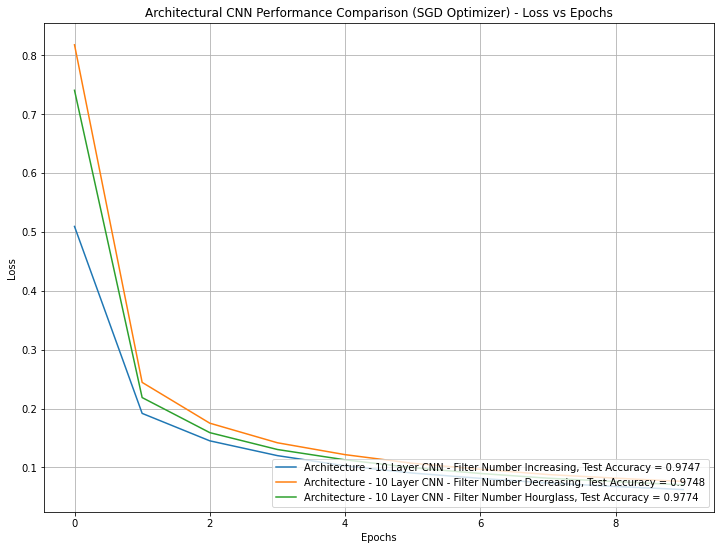

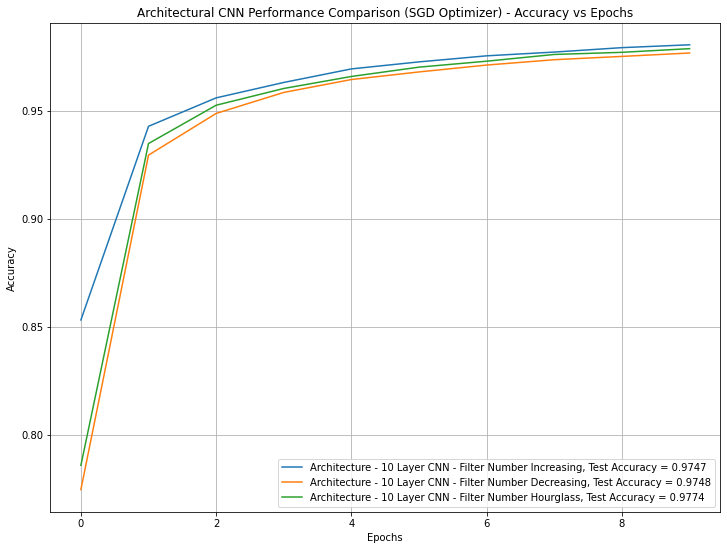

In [19]:
# Show the Loss vs Epochs for each architecture.
plt.figure(figsize=[12, 9])
plt.title("Architectural CNN Performance Comparison (SGD Optimizer) - Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(history1.history['loss'])
plt.plot(history2.history['loss'])
plt.plot(history3.history['loss'])
plt.legend([f'Architecture - 10 Layer CNN - Filter Number Increasing, Test Accuracy = {test1[1]:.4}', f'Architecture - 10 Layer CNN - Filter Number Decreasing, Test Accuracy = {test2[1]:.4}', f'Architecture - 10 Layer CNN - Filter Number Hourglass, Test Accuracy = {test3[1]:.4}'], loc='lower right')
plt.grid()
plt.show()

# Show the Loss vs Epochs for each architecture.
plt.figure(figsize=[12, 9])
plt.title("Architectural CNN Performance Comparison (SGD Optimizer) - Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(history1.history['accuracy'])
plt.plot(history2.history['accuracy'])
plt.plot(history3.history['accuracy'])
plt.legend([f'Architecture - 10 Layer CNN - Filter Number Increasing, Test Accuracy = {test1[1]:.4}', f'Architecture - 10 Layer CNN - Filter Number Decreasing, Test Accuracy = {test2[1]:.4}', f'Architecture - 10 Layer CNN - Filter Number Hourglass, Test Accuracy = {test3[1]:.4}'], loc='lower right')
plt.grid()
plt.show()

In [20]:
# Training the architectures defined above. 
e = 10
opt = keras.optimizers.Adam(learning_rate=0.0001)

#Compiling the model with a loss, optimizer, and other metrics
cnn_model1.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#Training the network.
cnn_model1.set_weights(c1)
history1 = cnn_model1.fit(x_train, y_train, epochs=e)
test1 = cnn_model1.evaluate(x_test, y_test)

#Compiling the model with a loss, optimizer, and other metrics
cnn_model2.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#Training the network.
cnn_model2.set_weights(c2)
history2 = cnn_model2.fit(x_train, y_train, epochs=e)
test2 = cnn_model2.evaluate(x_test, y_test)

#Compiling the model with a loss, optimizer, and other metrics
cnn_model3.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#Training the network.
cnn_model3.set_weights(c3)
history3 = cnn_model3.fit(x_train, y_train, epochs=e)
test3 = cnn_model3.evaluate(x_test, y_test)

Epoch 1/10


/home/lrburle/.local/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1875/1875 [==============================] - 10s 5ms/step - loss: 0.1896 - accuracy: 0.9463
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0528 - accuracy: 0.9839
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0354 - accuracy: 0.9886
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0249 - accuracy: 0.9920
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0202 - accuracy: 0.9933
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0149 - accuracy: 0.9952
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0124 - accuracy: 0.9960
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0108 - accuracy: 0.9962
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0102 - accuracy: 0.9964
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0.0371 - accurac

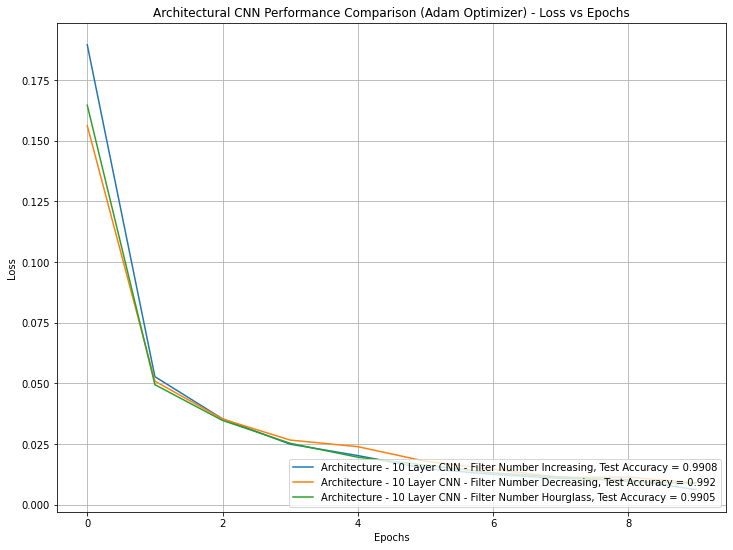

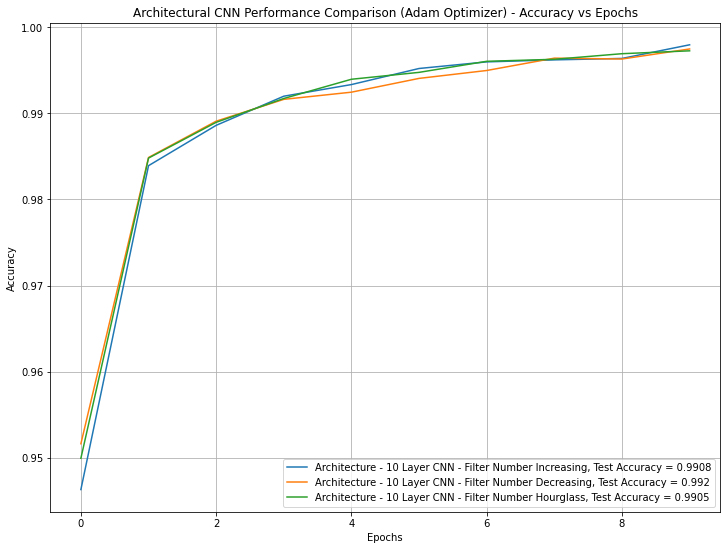

In [21]:
# Show the Loss vs Epochs for each architecture.
plt.figure(figsize=[12, 9])
plt.title("Architectural CNN Performance Comparison (Adam Optimizer) - Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(history1.history['loss'])
plt.plot(history2.history['loss'])
plt.plot(history3.history['loss'])
plt.legend([f'Architecture - 10 Layer CNN - Filter Number Increasing, Test Accuracy = {test1[1]:.4}', f'Architecture - 10 Layer CNN - Filter Number Decreasing, Test Accuracy = {test2[1]:.4}', f'Architecture - 10 Layer CNN - Filter Number Hourglass, Test Accuracy = {test3[1]:.4}'], loc='lower right')
plt.grid()
plt.show()

# Show the Loss vs Epochs for each architecture.
plt.figure(figsize=[12, 9])
plt.title("Architectural CNN Performance Comparison (Adam Optimizer) - Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(history1.history['accuracy'])
plt.plot(history2.history['accuracy'])
plt.plot(history3.history['accuracy'])
plt.legend([f'Architecture - 10 Layer CNN - Filter Number Increasing, Test Accuracy = {test1[1]:.4}', f'Architecture - 10 Layer CNN - Filter Number Decreasing, Test Accuracy = {test2[1]:.4}', f'Architecture - 10 Layer CNN - Filter Number Hourglass, Test Accuracy = {test3[1]:.4}'], loc='lower right')
plt.grid()
plt.show()

In [22]:
# Training the architectures defined above. 
e = 10
opt = keras.optimizers.RMSprop(learning_rate=0.0001)

#Compiling the model with a loss, optimizer, and other metrics
cnn_model1.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#Training the network.
cnn_model1.set_weights(c1)
history1 = cnn_model1.fit(x_train, y_train, epochs=e)
test1 = cnn_model1.evaluate(x_test, y_test)

#Compiling the model with a loss, optimizer, and other metrics
cnn_model2.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#Training the network.
cnn_model2.set_weights(c2)
history2 = cnn_model2.fit(x_train, y_train, epochs=e)
test2 = cnn_model2.evaluate(x_test, y_test)

#Compiling the model with a loss, optimizer, and other metrics
cnn_model3.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#Training the network.
cnn_model3.set_weights(c3)
history3 = cnn_model3.fit(x_train, y_train, epochs=e)
test3 = cnn_model3.evaluate(x_test, y_test)

Epoch 1/10


/home/lrburle/.local/lib/python3.8/site-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


1875/1875 [==============================] - 14s 7ms/step - loss: 0.1909 - accuracy: 0.9434
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0505 - accuracy: 0.9845
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0320 - accuracy: 0.9899
Epoch 4/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0217 - accuracy: 0.9934
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0182 - accuracy: 0.9946
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0127 - accuracy: 0.9961
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0100 - accuracy: 0.9969
Epoch 8/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0096 - accuracy: 0.9978
Epoch 9/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0075 - accuracy: 0.9980
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0.0436 - 

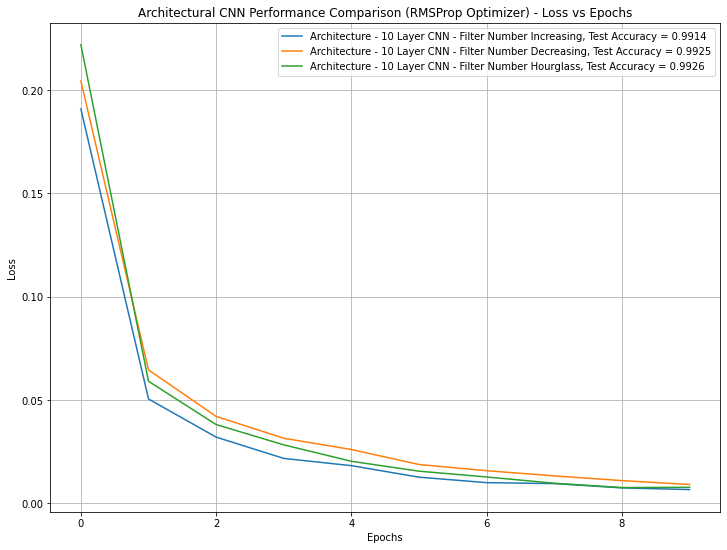

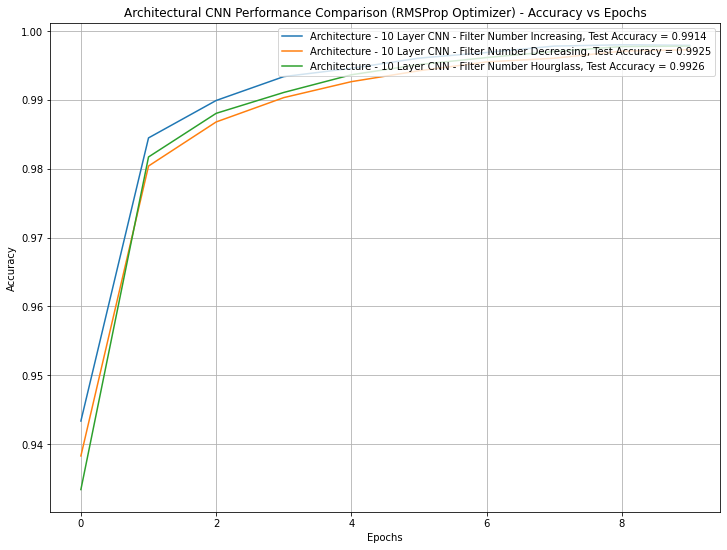

In [23]:
# Show the Loss vs Epochs for each architecture.
plt.figure(figsize=[12, 9])
plt.title("Architectural CNN Performance Comparison (RMSProp Optimizer) - Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(history1.history['loss'])
plt.plot(history2.history['loss'])
plt.plot(history3.history['loss'])
plt.legend([f'Architecture - 10 Layer CNN - Filter Number Increasing, Test Accuracy = {test1[1]:.4}', f'Architecture - 10 Layer CNN - Filter Number Decreasing, Test Accuracy = {test2[1]:.4}', f'Architecture - 10 Layer CNN - Filter Number Hourglass, Test Accuracy = {test3[1]:.4}'], loc='upper right')
plt.grid()
plt.show()

# Show the Loss vs Epochs for each architecture.
plt.figure(figsize=[12, 9])
plt.title("Architectural CNN Performance Comparison (RMSProp Optimizer) - Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(history1.history['accuracy'])
plt.plot(history2.history['accuracy'])
plt.plot(history3.history['accuracy'])
plt.legend([f'Architecture - 10 Layer CNN - Filter Number Increasing, Test Accuracy = {test1[1]:.4}', f'Architecture - 10 Layer CNN - Filter Number Decreasing, Test Accuracy = {test2[1]:.4}', f'Architecture - 10 Layer CNN - Filter Number Hourglass, Test Accuracy = {test3[1]:.4}'], loc='upper right')
plt.grid()
plt.show()

In [24]:
#Compiling the model with a loss, optimizer, and other metrics
learning = np.linspace(0.0001, 0.005, 4)
history1 = []
test1 = []
history2 = []
test2 = []
history3 = []
test3 = []

cnn_model1.compile(loss="sparse_categorical_crossentropy",
            optimizer="adam",
            metrics=["accuracy"])

cnn_model1.set_weights(c1)
history1.append(cnn_model1.fit(x_train, y_train, epochs=e, batch_size=32))
test1.append(cnn_model1.evaluate(x_test, y_test))

cnn_model2.compile(loss="sparse_categorical_crossentropy",
            optimizer="adam",
            metrics=["accuracy"])

cnn_model2.set_weights(c2)
history2.append(cnn_model2.fit(x_train, y_train, epochs=e, batch_size=32))
test2.append(cnn_model2.evaluate(x_test, y_test))

cnn_model3.compile(loss="sparse_categorical_crossentropy",
            optimizer="adam",
            metrics=["accuracy"])

cnn_model3.set_weights(c3)
history3.append(cnn_model3.fit(x_train, y_train, epochs=e, batch_size=32))
test3.append(cnn_model3.evaluate(x_test, y_test))

for learning_raten in learning:
    cnn_model1.set_weights(c1)
    cnn_model2.set_weights(c2)
    cnn_model3.set_weights(c3)

    opt = keras.optimizers.Adam(learning_rate=learning_raten)
    cnn_model1.compile(loss="sparse_categorical_crossentropy",
                optimizer=opt,
                metrics=["accuracy"])

    cnn_model2.compile(loss="sparse_categorical_crossentropy",
                optimizer=opt,
                metrics=["accuracy"])

    cnn_model3.compile(loss="sparse_categorical_crossentropy",
                optimizer=opt,
                metrics=["accuracy"])

    #Shows the whole network topology for the compiled CNN
    cnn_model1.summary()
    cnn_model2.summary()
    cnn_model3.summary()

    #Training the network.
    history1.append(cnn_model1.fit(x_train, y_train, epochs=e, batch_size=32)) 
    history2.append(cnn_model2.fit(x_train, y_train, epochs=e, batch_size=32)) 
    history3.append(cnn_model3.fit(x_train, y_train, epochs=e, batch_size=32)) 

    test1.append(cnn_model1.evaluate(x_test, y_test))
    test2.append(cnn_model2.evaluate(x_test, y_test))
    test3.append(cnn_model3.evaluate(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1749 - accuracy: 0.9502
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0551 - accuracy: 0.9838
Epoch 3/10
1521/1875 [=======================>......] - ETA: 1s - loss: 0.0478 - accuracy: 0.9862

In [ ]:
# Show the Loss vs Epochs for each architecture.
plt.figure(figsize=[12, 9])
plt.title("CNN Performance (Changing Learning Rate,  Filter Number Increase) - Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")

for idx, i in enumerate(history1):
	if(idx == 0):
		plt.plot(history1[idx].history['loss'], label=f'Original Model, Evaulation Accuracy = {test1[idx][1]:.4}')
	else:
		plt.plot(history1[idx].history['loss'], label=f'Learning Rate = {learning[idx-1]:.4}, Evaulation Accuracy = {test1[idx][1]:.4}')

plt.legend(loc="lower right")
plt.grid()
plt.show()

# Plotting the accuracy versus the epochs in the training parameters.
plt.figure(figsize=[12, 9])
plt.title("CNN Performance (Changing Learning Rate, Filter Number Increase) - Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

best = history1[1].history['accuracy']

for idx, i in enumerate(history1):
	if (idx == 0):
		plt.plot(history1[idx].history['accuracy'], label=f'Original Model, Evaulation Accuracy = {test1[idx][1]:.4}')
	else:
		plt.plot(history1[idx].history['accuracy'], label=f'Learning Rate = {learning[idx-1]:.4}, Evaulation Accuracy = {test1[idx][1]:.4}')
		

plt.grid()
plt.legend(loc="lower right")
plt.show()


# Show the Loss vs Epochs for each architecture.
plt.figure(figsize=[12, 9])
plt.title("CNN Performance (Changing Learning Rate,  Filter Number Decrease) - Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")

for idx, i in enumerate(history2):
	if(idx == 0):
		plt.plot(history2[idx].history['loss'], label=f'Original Model, Evaulation Accuracy = {test2[idx][1]:.4}')
	else:
		plt.plot(history2[idx].history['loss'], label=f'Learning Rate = {learning[idx-1]:.4}, Evaulation Accuracy = {test2[idx][1]:.4}')

plt.legend(loc="lower right")
plt.grid()
plt.show()

# Plotting the accuracy versus the epochs in the training parameters.
plt.figure(figsize=[12, 9])
plt.title("CNN Performance (Changing Learning Rate, Filter Number Decrease) - Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

best = history1[1].history['accuracy']

for idx, i in enumerate(history2):
	if (idx == 0):
		plt.plot(history2[idx].history['accuracy'], label=f'Original Model, Evaulation Accuracy = {test2[idx][1]:.4}')
	else:
		plt.plot(history2[idx].history['accuracy'], label=f'Learning Rate = {learning[idx-1]:.4}, Evaulation Accuracy = {test2[idx][1]:.4}')
		
plt.grid()
plt.legend(loc="lower right")
plt.show()

# Show the Loss vs Epochs for each architecture.
plt.figure(figsize=[12, 9])
plt.title("CNN Performance (Changing Learning Rate,  Filter Hourglass) - Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")

for idx, i in enumerate(history3):
	if(idx == 0):
		plt.plot(history3[idx].history['loss'], label=f'Original Model, Evaulation Accuracy = {test3[idx][1]:.4}')
	else:
		plt.plot(history3[idx].history['loss'], label=f'Learning Rate = {learning[idx-1]:.4}, Evaulation Accuracy = {test3[idx][1]:.4}')

plt.legend(loc="lower right")
plt.grid()
plt.show()

# Plotting the accuracy versus the epochs in the training parameters.
plt.figure(figsize=[12, 9])
plt.title("CNN Performance (Changing Learning Rate, Filter Hourglass) - Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

for idx, i in enumerate(history3):
	if (idx == 0):
		plt.plot(history3[idx].history['accuracy'], label=f'Original Model, Evaulation Accuracy = {test3[idx][1]:.4}')
	else:
		plt.plot(history3[idx].history['accuracy'], label=f'Learning Rate = {learning[idx-1]:.4}, Evaulation Accuracy = {test3[idx][1]:.4}')
		

plt.grid()
plt.legend(loc="lower right")
plt.show()

In [ ]:
#Compiling the model with a loss, optimizer, and other metrics
batches = [16, 32, 64]
history1 = []
test1 = []
history2 = []
test2 = []
history3 = []
test3 = []

cnn_model1.set_weights(c1)
cnn_model2.set_weights(c2)
cnn_model3.set_weights(c3)

opt = keras.optimizers.Adam(learning_rate=0.0001)
cnn_model1.compile(loss="sparse_categorical_crossentropy",
            optimizer=opt,
            metrics=["accuracy"])

history1.append(cnn_model1.fit(x_train, y_train, epochs=e, batch_size=32))
test1.append(cnn_model1.evaluate(x_test, y_test))

cnn_model2.compile(loss="sparse_categorical_crossentropy",
            optimizer=opt,
            metrics=["accuracy"])

history2.append(cnn_model1.fit(x_train, y_train, epochs=e, batch_size=32))
test2.append(cnn_model1.evaluate(x_test, y_test))

cnn_model3.compile(loss="sparse_categorical_crossentropy",
            optimizer=opt,
            metrics=["accuracy"])

history3.append(cnn_model1.fit(x_train, y_train, epochs=e, batch_size=32))
test3.append(cnn_model1.evaluate(x_test, y_test))

for bat in batches:
    cnn_model1.set_weights(c1)
    cnn_model2.set_weights(c2)
    cnn_model3.set_weights(c3)
    cnn_model1.compile(loss="sparse_categorical_crossentropy",
            optimizer=opt,
            metrics=["accuracy"])
    cnn_model2.compile(loss="sparse_categorical_crossentropy",
            optimizer=opt,
            metrics=["accuracy"])
    cnn_model3.compile(loss="sparse_categorical_crossentropy",
            optimizer=opt,
            metrics=["accuracy"])
    #Shows the whole network topology for the compiled CNN
    cnn_model1.summary()
    cnn_model2.summary()
    cnn_model3.summary()

    #Training the network.
    history1.append(cnn_model1.fit(x_train, y_train, epochs=e, batch_size=bat)) 
    history2.append(cnn_model2.fit(x_train, y_train, epochs=e, batch_size=bat)) 
    history3.append(cnn_model3.fit(x_train, y_train, epochs=e, batch_size=bat)) 

    test1.append(cnn_model1.evaluate(x_test, y_test))
    test2.append(cnn_model2.evaluate(x_test, y_test))
    test3.append(cnn_model3.evaluate(x_test, y_test))

In [ ]:
# Show the Loss vs Epochs for each architecture.
plt.figure(figsize=[12, 9])
plt.title("CNN Performance (Changing Batch Size,  Filter Number Increase) - Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")

for idx, i in enumerate(history1):
	if(idx == 0):
		plt.plot(history1[idx].history['loss'], label=f'Original Model, Evaulation Accuracy = {test1[idx][1]:.4}')
	else:
		plt.plot(history1[idx].history['loss'], label=f'Batch Size = {batches[idx-1]:.4}, Evaulation Accuracy = {test1[idx][1]:.4}')

plt.legend(loc="lower right")
plt.grid()
plt.show()

# Plotting the accuracy versus the epochs in the training parameters.
plt.figure(figsize=[12, 9])
plt.title("CNN Performance (Changing Batch Size, Filter Number Increase) - Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

best = history1[1].history['accuracy']

for idx, i in enumerate(history1):
	if (idx == 0):
		plt.plot(history1[idx].history['accuracy'], label=f'Original Model, Evaulation Accuracy = {test1[idx][1]:.4}')
	else:
		plt.plot(history1[idx].history['accuracy'], label=f'Batch Size = {batches[idx-1]:.4}, Evaulation Accuracy = {test1[idx][1]:.4}')
		

plt.grid()
plt.legend(loc="lower right")
plt.show()


# Show the Loss vs Epochs for each architecture.
plt.figure(figsize=[12, 9])
plt.title("CNN Performance (Changing Batch Size,  Filter Number Decrease) - Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")

for idx, i in enumerate(history2):
	if(idx == 0):
		plt.plot(history2[idx].history['loss'], label=f'Original Model, Evaulation Accuracy = {test2[idx][1]:.4}')
	else:
		plt.plot(history2[idx].history['loss'], label=f'Batch Size = {batches[idx-1]:.4}, Evaulation Accuracy = {test2[idx][1]:.4}')

plt.legend(loc="lower right")
plt.grid()
plt.show()

# Plotting the accuracy versus the epochs in the training parameters.
plt.figure(figsize=[12, 9])
plt.title("CNN Performance (Changing Batch Size, Filter Number Decrease) - Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

best = history1[1].history['accuracy']

for idx, i in enumerate(history2):
	if (idx == 0):
		plt.plot(history2[idx].history['accuracy'], label=f'Original Model, Evaulation Accuracy = {test2[idx][1]:.4}')
	else:
		plt.plot(history2[idx].history['accuracy'], label=f'Batch Size = {batches[idx-1]:.4}, Evaulation Accuracy = {test2[idx][1]:.4}')
		
plt.grid()
plt.legend(loc="lower right")
plt.show()

# Show the Loss vs Epochs for each architecture.
plt.figure(figsize=[12, 9])
plt.title("CNN Performance (Changing Batch Size,  Filter Hourglass) - Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")

for idx, i in enumerate(history3):
	if(idx == 0):
		plt.plot(history3[idx].history['loss'], label=f'Original Model, Evaulation Accuracy = {test3[idx][1]:.4}')
	else:
		plt.plot(history3[idx].history['loss'], label=f'Batch Size = {batches[idx-1]:.4}, Evaulation Accuracy = {test3[idx][1]:.4}')

plt.legend(loc="lower right")
plt.grid()
plt.show()

# Plotting the accuracy versus the epochs in the training parameters.
plt.figure(figsize=[12, 9])
plt.title("CNN Performance (Changing Batch Size, Filter Hourglass) - Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

for idx, i in enumerate(history3):
	if (idx == 0):
		plt.plot(history3[idx].history['accuracy'], label=f'Original Model, Evaulation Accuracy = {test3[idx][1]:.4}')
	else:
		plt.plot(history3[idx].history['accuracy'], label=f'Batch Size = {batches[idx-1]:.4}, Evaulation Accuracy = {test3[idx][1]:.4}')
		

plt.grid()
plt.legend(loc="lower right")
plt.show()

### Problem 1 - Response

In response to __Problem 1's__ questions, the standard RMSProp optimizer seemed to produce excellent results for the __Increasing__ architecture in both the training and test dataset. The accuracy for each was recorded as 99.997% and 99.49% respectively. This result utilized a 0.0001 learning rate and a batch size of 32. The __Decreasing__ and __Hourglass__ architectures both acheived similar results with a learning rate set to 0.0001 and batch size of 32. Both of which exceeded 98% accuracy on both the training and test data sets using these hyperparameters. RMSProp provided the best accuracy out of the other optimizers used (i.e. SGD and Adam) and also provided the most distinct performance discrepencies between the three models. The learning rate seemed to produce the most meaningful impact on the accuracy across all architectures. The batch size also produced various differences in the three tested architectures but ultimately, these changes in accuracy were negligible and often required much longer turn around in terms of epoch step time as well to produce minimal accuracy improvements. The accuracy would decrease as the batch number decreased and would increase as the batch size increased. The delay in each epoch step would greatly increase as the batch size increased. The best performance for each architecture is using a learning rate of 0.0001, batch size of 32, and RMSProp optimizer in terms of both train and test dataset prediction accuracy. 

Increaing the learning rate with the Adam optimizer produced results of diminishing returns as the accuracy plateaued during the training phase with similar accuracy results for the testing portion. 

Changing the batch size, as mentioned above, improved the step time needed to weave through the architecture. However, the accuracy improvements were negligible during testing and proved to have a much lower impact on the overall accuracy performance compared to the learning rate or optimizer chosen. A batch size of 32 paired with a 0.0001 learning rate proved to have excellent results across the board. 

***

## Problem 2

The following code demonstrates the LaNet7 architecture in tensorflow using the MNIST dataset. 

In [ ]:
#Pulling in the cifar10 test data.
cifar10 = keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data() 

The following code represents the sequential LeNet model and the code needed to train based upon
changing the learning rate.

In [ ]:
# Building the LeNet model in keras
e = 25
lanet = keras.models.Sequential([
    keras.layers.Conv2D(6, (5, 5), strides=(1, 1), padding='same', input_shape = (32, 32, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    keras.layers.Conv2D(16, (5, 5), strides=(1,1), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    keras.layers.Conv2D(120, (5, 5), strides=(1, 1), padding='same', activation='relu'),

    keras.layers.Flatten(),
    keras.layers.Dense(84, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])


#Compiling the model with a loss, optimizer, and other metrics
learning = np.linspace(0.0001, 0.005, 3)
history4 = []
test4 = []

lanet.compile(loss="sparse_categorical_crossentropy",
            optimizer="adam",
            metrics=["accuracy"])

l1 = lanet.get_weights()

history4.append(lanet.fit(x_train, y_train, epochs=e, batch_size=32))
test4.append(lanet.evaluate(x_test, y_test))

for learning_raten in learning:
    lanet.set_weights(l1)
    opt = keras.optimizers.Adam(learning_rate=learning_raten)
    lanet.compile(loss="sparse_categorical_crossentropy",
                optimizer=opt,
                metrics=["accuracy"])

    #Shows the whole network topology for the compiled CNN
    lanet.summary()

    #Training the network.
    history4.append(lanet.fit(x_train, y_train, epochs=e, batch_size=32)) 
    test4.append(lanet.evaluate(x_test, y_test))


In [ ]:
# Show the Loss vs Epochs for each architecture.
plt.figure(figsize=[12, 9])
plt.title("LeNet Performance (Changing Learning Rate) - Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")

for idx, i in enumerate(history4):
	if(idx == 0):
		plt.plot(history4[idx].history['loss'], label=f'Original Model, Evaulation Accuracy = {test4[idx][1]:.4}')
	else:
		plt.plot(history4[idx].history['loss'], label=f'Learning Rate = {learning[idx-1]:.4}, Evaulation Accuracy = {test4[idx][1]:.4}')

plt.legend(loc="lower right")
plt.grid()
plt.show()

# Plotting the accuracy versus the epochs in the training parameters.
plt.figure(figsize=[12, 9])
plt.title("LeNet Performance (Changing Learning Rate) - Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

best = history4[1].history['accuracy']

for idx, i in enumerate(history4):
	if (idx == 0):
		plt.plot(history4[idx].history['accuracy'], label=f'Original Model, Evaulation Accuracy = {test4[idx][1]:.4}')
	else:
		plt.plot(history4[idx].history['accuracy'], label=f'Learning Rate = {learning[idx-1]:.4}, Evaulation Accuracy = {test4[idx][1]:.4}')

plt.grid()
plt.legend(loc="lower right")
plt.show()

### Problem 2 - Batch Size
The following code represents the altering of the batch size in relation to the model accuracy. 

In [ ]:
#Compiling the model with a loss, optimizer, and other metrics
batches = [16, 32, 64] 
history4 = []
test4 = []

lanet.set_weights(l1)
opt = keras.optimizers.Adam(learning_rate=0.0001)
lanet.compile(loss="sparse_categorical_crossentropy",
            optimizer=opt,
            metrics=["accuracy"])

history4.append(lanet.fit(x_train, y_train, epochs=e, batch_size=8))
test4.append(lanet.evaluate(x_test, y_test))

for bat in batches:
    lanet.set_weights(l1)
    lanet.compile(loss="sparse_categorical_crossentropy",
            optimizer=opt,
            metrics=["accuracy"])
    #Shows the whole network topology for the compiled CNN
    lanet.summary()

    #Training the network.
    history4.append(lanet.fit(x_train, y_train, epochs=e, batch_size=bat)) 
    test4.append(lanet.evaluate(x_test, y_test))

In [ ]:
# Show the Loss vs Epochs for each architecture.
plt.figure(figsize=[12, 9])
plt.title("LeNet Performance (Changing Batch Size) - Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")

for idx, i in enumerate(history4):
	if(idx == 0):
		plt.plot(history4[idx].history['loss'], label=f'Original Model, Evaulation Accuracy = {test4[idx][1]:.4}')
	else:
		plt.plot(history4[idx].history['loss'], label=f'Batch Size = {batches[idx-1]}, Evaulation Accuracy = {test4[idx][1]:.4}')

plt.legend(loc="lower right")
plt.grid()
plt.show()

# Plotting the accuracy versus the epochs in the training parameters.
plt.figure(figsize=[12, 9])
plt.title("LeNet Performance (Changing Batch Size) - Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

for idx, i in enumerate(history4):
	if (idx == 0):
		plt.plot(history4[idx].history['accuracy'], label=f'Original Model, Evaulation Accuracy = {test4[idx][1]:.4}')
	else:
		plt.plot(history4[idx].history['accuracy'], label=f'Batch Size = {batches[idx-1]}, Evaulation Accuracy = {test4[idx][1]:.4}')
		

plt.grid()
plt.legend(loc="lower right")
plt.show()

### Problem 2 - Best Performance
The best performing network was the lowest learning rate of 0.0001 tested with the batch size of 16.
These hyperparameters seemed to produce the greatest accuracy from the test data set. See this code
below. 

In [ ]:
history4 = []
test4 = []

learning = 0.0001
batch = 16

lanet.set_weights(l1)
opt = keras.optimizers.Adam(learning_rate=learning)
lanet.compile(loss="sparse_categorical_crossentropy",
            optimizer=opt,
            metrics=["accuracy"])

history4.append(lanet.fit(x_train, y_train, epochs=25, batch_size=batch))
test4.append(lanet.evaluate(x_test, y_test))

In [ ]:
# Show the Loss vs Epochs for each architecture.
plt.figure(figsize=[12, 9])
plt.title("LeNet Performance (Best Performance) - Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.plot(history4[idx].history['loss'], label=f'Learning Rate = {learning}, Batch Size = {batch}, Evaulation Accuracy = {test4[1]:.4}')

plt.legend(loc="lower right")
plt.grid()
plt.show()

# Plotting the accuracy versus the epochs in the training parameters.
plt.figure(figsize=[12, 9])
plt.title("LeNet Performance (Best Performance) - Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.plot(history4[idx].history['accuracy'], label=f'Learning Rate = {learning}, Batch Size = {batch}, Evaulation Accuracy = {test4[1]:.4}')

plt.grid()
plt.legend(loc="lower right")
plt.show()

### Problem 2 - Deep Learning Model
The following code represents the LeNet 5 model as a deep learning model.

In [ ]:
# Building the LeNet model in keras
lanet_deep = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [32, 32, 3]),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(120, activation='relu'),
    keras.layers.Dense(84, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

#Compiling the model with a loss, optimizer, and other metrics
opt = keras.optimizers.Adam(learning_rate=0.0001)
lanet_deep.compile(loss="sparse_categorical_crossentropy",
              optimizer=opt,
              metrics=["accuracy"])

#Shows the whole network topology for the compiled CNN
lanet_deep.summary()

#Training the network.
history5 = lanet_deep.fit(x_train, y_train, epochs=25, batch_size=32)
test5 = lanet_deep.evaluate(x_test, y_test)

print(f"From the deep learning model, the loss achieved and accuracy achieved are: {test5[0]} and {test5[1]} respectively.")

### Problem 2 - Question Responses
The following list are the responses to the questions shown in the assignment document. 

1. As the learning rate increases, the accuracy and loss both stagnated. The Adam optimizer uses the
   default learning rate of 0.0001 value. Utilizing a lower learning rate with the Adam optimizer
   yields better accuracy in the test dataset but not a great one. As shown in the above graphs, the
   0.0001 learning rate yielded a 0.60 accuracy for the test dataset during evaluation. 
2. The batch size allowed for a faster turnaround as it was increased from the default 32 and it
   would increase the step time per epoch as the batch size decreased from 32 to 8 and 16
   respectively.  
3. The best performing LaNet5 network utilized the following hyperparameter values: 0.0001 learning rate, 32 batch size, and the Adam optmizer. This combination of parameters with the number of epochs set to 25, yielded a test accuracy of 90+% and a test dataset accuracy of greater than 60%. Without the use of a validation dataset, the best accuracy that can be achieved with the circumstance is around 60% for this model. 
4. The results of the deep learning model are lackluster compared to the CNN counterpart. The
   convolutional layers provided much better performance for feature extraction in comparison to the
   dense layers. The number of parameters within this network, however, are just 31,604 compared to
   the 697,047 parameters found in the LaNet5 architecture shown above. The greater number of
   parameters in the CNN are well worth it due to the excellent performance found using the CNN
   architecture. The accuracy achieved in the CNN network versus the DNN is starkly different in the
   amount of epochs used to train the networks. The accuracy of the CNN is seemingly six times
   better than the DNN. The DNN also plateaued at 10% accuracy in comparison to the 90+% accuracy
   achieved during training over the same amount of epoch steps. 
***

# Problem 3
The goal of problem 3 is to showcase the convolution and max pooling operation used within a CNN architecture. Please see below code for the inner workings on how these functions work. 

In [ ]:
X = np.array([[7, 5, 0, 0, 3, 2], [6, 4, 5, 1, 4, 8], [9, 0, 2, 2, 5, 4],  [6, 3, 4, 7, 9, 8], [5, 7, 5, 6, 9, 0], [7, 9, 0, 8, 2, 3]])
f = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])

[a, b] = X.shape
y = np.zeros((a-2, b-2))

#Algorithm for manual convolution:
for i in range(1, X.shape[0]-1):
	for j in range(1, X.shape[1]-1):
		x = X[(i-1):(i+2), (j-1):(j+2)]
		s = np.add(f, x)
		y[i-1, j-1] = s.sum()

print('Output of the convolution between the X and f matrices shown above is shown below:')
print(y)

In [ ]:
# The following is the max pooling operation performed on the above output. 
o = np.zeros((2, 2))

o[0, 0] = np.max(y[0:2, 0:2])
o[1, 0] = np.max(y[2:4, 0:2])
o[0, 1] = np.max(y[0:2, 2:4])
o[1, 1] = np.max(y[2:4, 2:4])

print('Output of the max pooling operation.')
print(o)

The following are responses to the Problem 3 questions. 
1. The dimensions of the input and kernel are 6x6x1 and 3x3x1 respectively. The number of parameters
   is ((3x3x1)+1)x1 = 10 
2. The output activation map is shown above. The dimensions 4x4x1. 
3. See the output of the max pooling using a stride of (2,2) and a filter size of (2,2) with no
   padding. 